In [1]:
!git clone --depth 1 https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 1), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 1.53 MiB | 36.35 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Installing konlpy.....
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 94.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 29.7 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-05-23 00:12:49--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.136, 13.200.41.134, 13

In [2]:
!pip install mecab-python3

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 588.8/588.8 kB 35.9 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
from sklearn.model_selection import train_test_split
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Mecab
from tqdm.notebook import tqdm
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#1.baseline

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_df1 = pd.read_csv("train.csv")
train_df2 = pd.read_csv("eda_train.csv")
valid_df = pd.read_csv("valid.csv")

# Î≥ëÌï©
train_df = pd.concat([train_df1, train_df2], ignore_index=True)

In [3]:
mecab = Mecab()

In [4]:
def preprocess(sentence):
    sentence = re.sub(r"[^a-z0-9Í∞Ä-Ìû£\.!\?\s]", "", sentence)
    return mecab.morphs(sentence)

In [5]:
# df["Q_"] = df["Q"].apply(preprocess)
# df["A_"] = df["A"].apply(preprocess)
# token_leng1 = df["Q_"].apply(lambda x: len(x))
# token_leng2 = df["A_"].apply(lambda x: len(x))

# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.hist(token_leng1, bins=50, color="lightcoral", edgecolor="black")
# plt.title("question distribution")
# plt.xlabel("number of tokens")
# plt.ylabel("count")
# plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.hist(token_leng2, bins=50, color="mediumseagreen", edgecolor="black")
# plt.title("answer distribution")
# plt.xlabel("number of tokens")
# plt.ylabel("count")
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [6]:
def build_corpus(df):
    df.dropna(inplace=True)
    df["Q_"] = df["Q"].apply(preprocess)
    df["A_"] = df["A"].apply(preprocess)
    df.drop_duplicates(subset=["Q_"], inplace=True)
    df.drop_duplicates(subset=["A_"], inplace=True)
    df.reset_index(drop=True, inplace=True)

    que_corpus, ans_corpus = [], []
    for i in range(len(df)):
        if len(df["Q_"][i]) < 28 and len(df["A_"][i]) < 35:
            que_corpus.append(df["Q_"][i])
            ans_corpus.append(["<SOS>"] + df["A_"][i] + ["<EOS>"])
    return que_corpus, ans_corpus

In [7]:
que_corpus_train, ans_corpus_train = build_corpus(train_df)
que_corpus_valid, ans_corpus_valid = build_corpus(valid_df)

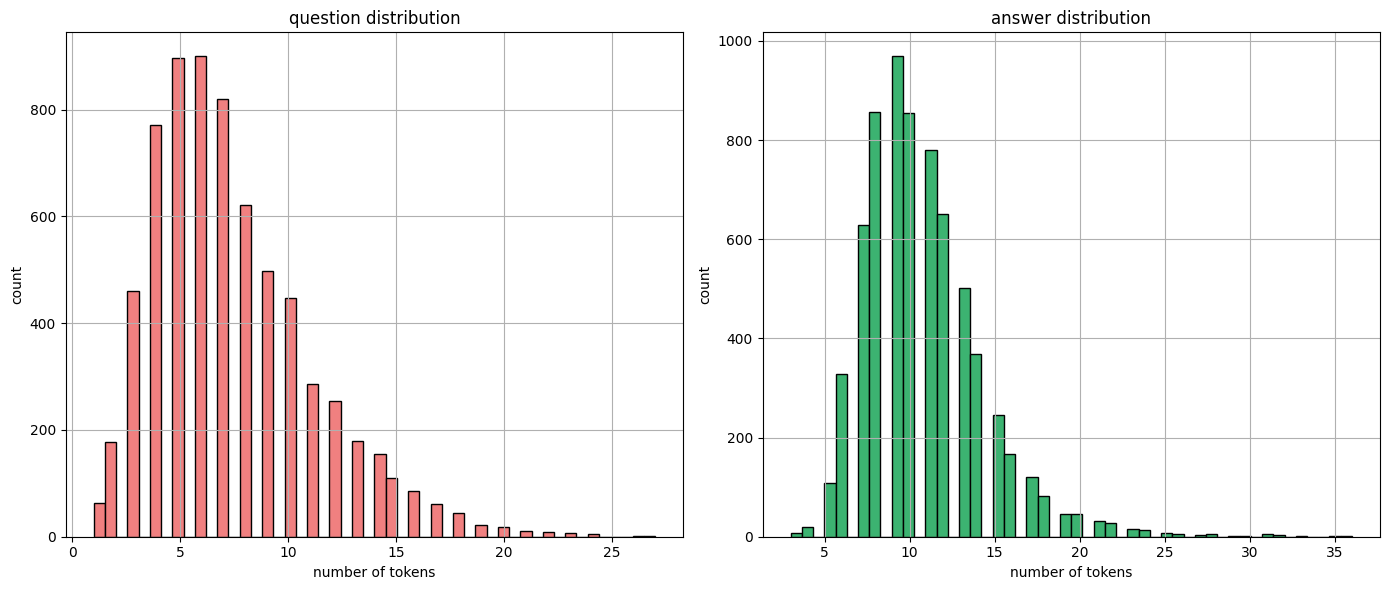

In [8]:
# ÌÜ†ÌÅ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
token_leng1 = pd.Series(que_corpus_train).apply(lambda x: len(x))
token_leng2 = pd.Series(ans_corpus_train).apply(lambda x: len(x))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(token_leng1, bins=50, color="lightcoral", edgecolor="black")
plt.title("question distribution")
plt.xlabel("number of tokens")
plt.ylabel("count")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(token_leng2, bins=50, color="mediumseagreen", edgecolor="black")
plt.title("answer distribution")
plt.xlabel("number of tokens")
plt.ylabel("count")
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
def compute_vocab_coverage(corpus, topk_list=[1000, 2000, 5000, 8000, 10000, 20000]):
    tokenizer = Tokenizer(filters="", oov_token=None)
    tokenizer.fit_on_texts(corpus)

    word_counts = tokenizer.word_counts  # collections.OrderedDict
    sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    total_tokens = sum([count for _, count in sorted_counts])

    print(f"Ï¥ù ÌÜ†ÌÅ∞ Ïàò: {total_tokens}")
    print(f"Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò (Í≥†Ïú†): {len(sorted_counts)}")

    cumulative = np.cumsum([count for _, count in sorted_counts])
    coverage_list = [
        cumulative[k - 1] / total_tokens * 100 if k <= len(cumulative) else 100.0
        for k in topk_list
    ]

    for k, cov in zip(topk_list, coverage_list):
        print(f"Vocab Size = {k:5d} ‚Üí Coverage: {cov:.2f}%")

    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(1, len(cumulative) + 1), cumulative / total_tokens * 100)
    plt.xlabel("Vocab Size (Top-N Words)")
    plt.ylabel("Coverage (%)")
    plt.title("Vocab Size vs. Token Coverage")
    plt.grid(True)
    plt.axhline(95, color="r", linestyle="--", label="95% Cutoff")
    plt.legend()
    plt.tight_layout()
    plt.show()

Ï¥ù ÌÜ†ÌÅ∞ Ïàò: 125408
Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò (Í≥†Ïú†): 5944
Vocab Size =  1000 ‚Üí Coverage: 91.17%
Vocab Size =  2000 ‚Üí Coverage: 95.49%
Vocab Size =  5000 ‚Üí Coverage: 99.25%
Vocab Size =  8000 ‚Üí Coverage: 100.00%
Vocab Size = 10000 ‚Üí Coverage: 100.00%
Vocab Size = 20000 ‚Üí Coverage: 100.00%


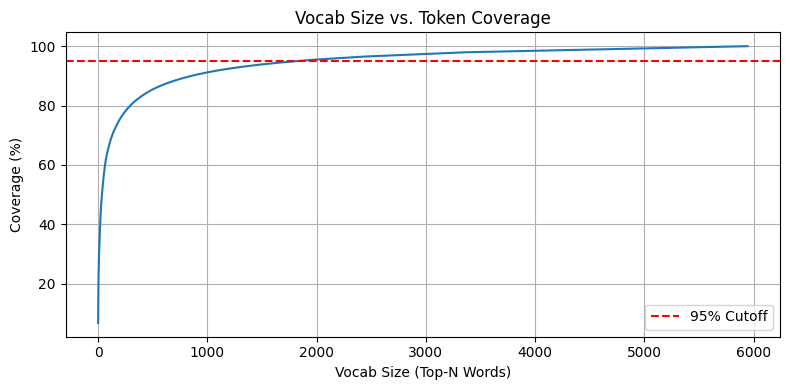

In [10]:
# ÌïôÏäµ ÏΩîÌçºÏä§ Í∏∞Ï§Ä Ïª§Î≤ÑÎ¶¨ÏßÄ ÌôïÏù∏
compute_vocab_coverage(que_corpus_train + ans_corpus_train)

In [11]:
def tokenize(corpus1, corpus2, vocab_size=None, oov_token="<OOV>"):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, filters="")
    tokenizer.fit_on_texts(corpus1 + corpus2)

    tensor1 = tokenizer.texts_to_sequences(corpus1)
    tensor2 = tokenizer.texts_to_sequences(corpus2)

    tensor1 = tf.keras.preprocessing.sequence.pad_sequences(tensor1, padding="post")
    tensor2 = tf.keras.preprocessing.sequence.pad_sequences(tensor2, padding="post")

    return tensor1, tensor2, tokenizer

In [12]:
enc_corpus, dec_corpus, tokenizer = tokenize(que_corpus_train, ans_corpus_train)

In [13]:
def tokenize_with_existing_tokenizer(corpus1, corpus2, tokenizer):
    tensor1 = tokenizer.texts_to_sequences(corpus1)
    tensor2 = tokenizer.texts_to_sequences(corpus2)

    tensor1 = tf.keras.preprocessing.sequence.pad_sequences(tensor1, padding="post")
    tensor2 = tf.keras.preprocessing.sequence.pad_sequences(tensor2, padding="post")

    return tensor1, tensor2

enc_valid, dec_valid = tokenize_with_existing_tokenizer(que_corpus_valid, ans_corpus_valid, tokenizer)

# tf.data.Dataset Íµ¨ÏÑ±
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((enc_corpus, dec_corpus))
train_dataset = train_dataset.shuffle(len(enc_corpus)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

valid_dataset = tf.data.Dataset.from_tensor_slices((enc_valid, dec_valid))
valid_dataset = valid_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [14]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, (2 * (i // 2)) / np.float32(d_model))

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table


def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]


def generate_lookahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask


def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_enc_mask = generate_padding_mask(src)

    dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
    dec_tgt_padding_mask = generate_padding_mask(tgt)
    dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

    return enc_mask, dec_enc_mask, dec_mask


# Multi Head Attention Íµ¨ÌòÑ
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)

        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None:
            scaled_qk += mask * -1e9

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions

    def split_heads(self, x):
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))

        return combined_x

    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)

        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)

        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask
        )

        out = self.combine_heads(out)
        out = self.linear(out)

        return out, attention_weights


class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff

        self.fc1 = tf.keras.layers.Dense(d_ff, activation="relu")
        self.fc2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)

        return out


class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, enc_attn


class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        # Q, K, V ÏàúÏÑúÏóê Ï£ºÏùòÌïòÏÑ∏Ïöî!
        out, dec_enc_attn = self.enc_dec_attn(
            Q=out, K=enc_out, V=enc_out, mask=dec_enc_mask
        )
        out = self.do(out)
        out += residual

        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn


class Encoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [
            EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)
        ]

        self.do = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask):
        out = x

        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)

        return out, enc_attns


class Decoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [
            DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)
        ]

    def call(self, x, enc_out, dec_enc_mask, padding_mask):
        out = x

        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = self.dec_layers[i](
                out, enc_out, dec_enc_mask, padding_mask
            )

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns


class Transformer(tf.keras.Model):
    def __init__(
        self,
        n_layers,
        d_model,
        n_heads,
        d_ff,
        src_vocab_size,
        tgt_vocab_size,
        pos_len,
        dropout=0.2,
        shared_fc=True,
        shared_emb=False,
    ):
        super(Transformer, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = tf.keras.layers.Embedding(
                src_vocab_size, d_model
            )
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc:
            out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        dec_out, dec_attns, dec_enc_attns = self.decoder(
            dec_in, enc_out, dec_enc_mask, dec_mask
        )

        logits = self.fc(dec_out)

        return logits, enc_attns, dec_attns, dec_enc_attns

In [15]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()

        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = step**-0.5
        arg2 = step * (self.warmup_steps**-1.5)

        return (self.d_model**-0.5) * tf.math.minimum(arg1, arg2)

In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction="none"
)


def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

In [17]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # DecoderÏùò input
    gold = tgt[
        :, 1:
    ]  # DecoderÏùò outputÍ≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ right shiftÎ•º ÌÜµÌï¥ ÏÉùÏÑ±Ìïú ÏµúÏ¢Ö ÌÉÄÍ≤ü

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = model(
            src, tgt_in, enc_mask, dec_enc_mask, dec_mask
        )
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [18]:
@tf.function
def eval_step(src, tgt, model):
    tgt_in = tgt[:, :-1]
    gold = tgt[:, 1:]

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    predictions, enc_attns, dec_attns, dec_enc_attns = model(
        src, tgt_in, enc_mask, dec_enc_mask, dec_mask
    )

    loss = loss_function(gold, predictions)

    return loss, enc_attns, dec_attns, dec_enc_attns

In [19]:
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best = None
        self.wait = 0
        self.stopped_epoch = 0
        self.stop_training = False

    def on_epoch_end(self, epoch, current):
        if self.best is None or current < self.best - self.min_delta:
            self.best = current
            self.wait = 0
            return True
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True
                self.stopped_epoch = epoch
            return False

In [20]:
def plot_loss_graph(train_log, test_log):
    epochs = range(1, len(train_log) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_log, label="Train Loss")
    plt.plot(epochs, test_log, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train/Test Loss per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [21]:
def greedy_decode(model, tokenizer, input_text, max_length=35, sos_id=None, eos_id=None):
    """
    Greedy decodingÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏûÖÎ†• ÌÖçÏä§Ìä∏Ïóê ÎåÄÌïú ÏùëÎãµÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

    Args:
        model: ÌïôÏäµÎêú Transformer Î™®Îç∏
        tokenizer: ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
        input_text: ÏûÖÎ†• ÌÖçÏä§Ìä∏ (Î¨∏ÏûêÏó¥)
        max_length: ÏÉùÏÑ±Ìï† ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥
        sos_id: Start of Sequence ÌÜ†ÌÅ∞ ID (Í∏∞Î≥∏Í∞í: "< SOS >" ÌÜ†ÌÅ∞ Ï∞æÍ∏∞)
        eos_id: End of Sequence ÌÜ†ÌÅ∞ ID (Í∏∞Î≥∏Í∞í: "<EOS>" ÌÜ†ÌÅ∞ Ï∞æÍ∏∞)

    Returns:
        str: ÏÉùÏÑ±Îêú ÏùëÎãµ ÌÖçÏä§Ìä∏
    """
    # SOS, EOS ÌÜ†ÌÅ∞ ID Ï∞æÍ∏∞
    if sos_id is None:
        sos_id = tokenizer.word_index.get("< SOS >", tokenizer.word_index.get("<SOS>", 2))
    if eos_id is None:
        eos_id = tokenizer.word_index.get("<EOS>", 3)

    # ÏûÖÎ†• ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï
    if isinstance(input_text, str):
        # Î¨∏ÏûêÏó¥Ïù∏ Í≤ΩÏö∞ mecabÏúºÎ°ú ÌòïÌÉúÏÜå Î∂ÑÏÑù
        processed_input = preprocess(input_text)
        input_sequence = tokenizer.texts_to_sequences([processed_input])
    else:
        # Ïù¥ÎØ∏ Î¶¨Ïä§Ìä∏Ïù∏ Í≤ΩÏö∞
        input_sequence = tokenizer.texts_to_sequences([input_text])

    # Ìå®Îî© Ï†ÅÏö©
    input_sequence = tf.keras.preprocessing.sequence.pad_sequences(
        input_sequence, padding='post'
    )

    # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä Î∞è int32 ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
    encoder_input = tf.convert_to_tensor(input_sequence, dtype=tf.int32)

    # ÎîîÏΩîÎçî ÏûÖÎ†• Ï¥àÍ∏∞Ìôî (SOS ÌÜ†ÌÅ∞ÏúºÎ°ú ÏãúÏûë, int32 ÌÉÄÏûÖ)
    decoder_input = tf.convert_to_tensor([[sos_id]], dtype=tf.int32)

    # ÏÉùÏÑ± Î£®ÌîÑ
    for i in range(max_length):
        # ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
        enc_mask, dec_enc_mask, dec_mask = generate_masks(encoder_input, decoder_input)

        # Î™®Îç∏ ÏòàÏ∏°
        predictions, _, _, _ = model(
            encoder_input, decoder_input, enc_mask, dec_enc_mask, dec_mask
        )

        # ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞Ïùò ÏòàÏ∏°Í∞íÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÜ†ÌÅ∞ ÏÑ†ÌÉù
        predicted_id = tf.argmax(predictions[:, -1:, :], axis=-1)

        # int32Î°ú ÌÉÄÏûÖ Î≥ÄÌôò (concat Ïò§Î•ò Î∞©ÏßÄ)
        predicted_id = tf.cast(predicted_id, tf.int32)

        # EOS ÌÜ†ÌÅ∞Ïù¥ ÏÉùÏÑ±ÎêòÎ©¥ Ï¢ÖÎ£å
        if predicted_id.numpy()[0, 0] == eos_id:
            break

        # ÎîîÏΩîÎçî ÏûÖÎ†•Ïóê ÏòàÏ∏°Îêú ÌÜ†ÌÅ∞ Ï∂îÍ∞Ä
        decoder_input = tf.concat([decoder_input, predicted_id], axis=-1)

    # ÏÉùÏÑ±Îêú ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôò
    generated_sequence = decoder_input.numpy()[0]

    # SOS, EOS ÌÜ†ÌÅ∞ Ï†úÍ±∞ Î∞è ÌÖçÏä§Ìä∏ Î≥ÄÌôò
    generated_tokens = []
    for token_id in generated_sequence[1:]:  # SOS ÌÜ†ÌÅ∞ Ï†úÏô∏
        if token_id == eos_id or token_id == 0:  # EOS ÎòêÎäî Ìå®Îî© ÌÜ†ÌÅ∞Ïù¥Î©¥ Ï¢ÖÎ£å
            break
        if token_id in tokenizer.index_word:
            generated_tokens.append(tokenizer.index_word[token_id])

    return ' '.join(generated_tokens)


# ÏÇ¨Ïö© ÏòàÏãú Ìï®Ïàò
def generate_response(model, tokenizer, question):
    """
    ÏßàÎ¨∏Ïóê ÎåÄÌïú ÏùëÎãµÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìé∏Ïùò Ìï®Ïàò

    Args:
        model: ÌïôÏäµÎêú Transformer Î™®Îç∏
        tokenizer: ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
        question: ÏßàÎ¨∏ Î¨∏ÏûêÏó¥

    Returns:
        str: ÏÉùÏÑ±Îêú ÏùëÎãµ
    """
    return greedy_decode(model, tokenizer, question)


# Î∞∞Ïπò Ï≤òÎ¶¨Î•º ÏúÑÌïú Ìï®Ïàò
def greedy_decode_batch(model, tokenizer, input_texts, max_length=35, sos_id=None, eos_id=None):
    """
    Ïó¨Îü¨ ÏûÖÎ†•Ïóê ÎåÄÌï¥ Î∞∞Ïπò Ï≤òÎ¶¨Î°ú greedy decoding ÏàòÌñâ

    Args:
        model: ÌïôÏäµÎêú Transformer Î™®Îç∏
        tokenizer: ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
        input_texts: ÏûÖÎ†• ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏
        max_length: ÏÉùÏÑ±Ìï† ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥
        sos_id: Start of Sequence ÌÜ†ÌÅ∞ ID
        eos_id: End of Sequence ÌÜ†ÌÅ∞ ID

    Returns:
        list: ÏÉùÏÑ±Îêú ÏùëÎãµ ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏
    """
    responses = []
    for text in input_texts:
        response = greedy_decode(model, tokenizer, text, max_length, sos_id, eos_id)
        responses.append(response)
    return responses

In [22]:
from nltk.translate.bleu_score import sentence_bleu

def compute_bleu_score(reference_texts, generated_texts):
    scores = []
    for ref, gen in zip(reference_texts, generated_texts):
        ref_tokens = ref.split()
        gen_tokens = gen.split()
        score = sentence_bleu([ref_tokens], gen_tokens, weights=(0.5, 0.5))
        scores.append(score)
    return sum(scores) / len(scores) if scores else 0

In [23]:
def ids_to_text(tokenizer, ids, pad_id=0):
    return ' '.join([tokenizer.index_word.get(i, '') for i in ids if i != 0 and i != pad_id])

def compute_bleu_from_validation(model, tokenizer, dataset, num_samples=10, sos_id=2, eos_id=3, pad_id=0):
    references = []
    predictions = []
    count = 0

    for src_batch, tgt_batch in dataset:
        for src, tgt in zip(src_batch.numpy(), tgt_batch.numpy()):
            if count >= num_samples:
                break

            src_text = ids_to_text(tokenizer, src)
            tgt_text = ids_to_text(tokenizer, tgt[1:])  # <sos> Ï†úÏô∏

            pred_text = greedy_decode(model, tokenizer, src_text, sos_id=sos_id, eos_id=eos_id)

            references.append(tgt_text)
            predictions.append(pred_text)

            count += 1

        if count >= num_samples:
            break

    return compute_bleu_score(references, predictions)

In [24]:
def main(
    transformer,
    optimizer,
    name,
    EPOCHS=10,
    early_stopping=EarlyStopping(patience=3, min_delta=0.001),
    train_dataset=train_dataset,
    valid_dataset=valid_dataset,
    save=True,
):
    train_log = []
    valid_log = []

    for epoch in range(EPOCHS):
        total_loss = 0
        dataset_count = tf.data.experimental.cardinality(train_dataset).numpy()
        tqdm_bar = tqdm(total=dataset_count)

        for batch, (src, tgt) in enumerate(train_dataset):
            loss, _, _, _ = train_step(src, tgt, transformer, optimizer)
            total_loss += loss
            tqdm_bar.set_description(f"Epoch {epoch + 1}")
            tqdm_bar.set_postfix(loss=total_loss.numpy() / (batch + 1))
            tqdm_bar.update(1)

        tqdm_bar.close()
        train_epoch_loss = total_loss.numpy() / dataset_count
        train_log.append(train_epoch_loss)

        val_loss_total = 0
        val_batches = tf.data.experimental.cardinality(valid_dataset).numpy()

        for batch, (src, tgt) in enumerate(valid_dataset):
            loss, _, _, _ = eval_step(src, tgt, transformer)
            val_loss_total += loss

        val_epoch_loss = val_loss_total.numpy() / val_batches
        valid_log.append(val_epoch_loss)

        # BLEU Í≥ÑÏÇ∞
        bleu_score = compute_bleu_from_validation(transformer, tokenizer, valid_dataset, num_samples=10)

        # üî∏ ÏàòÏ†ïÎêú Ï∂úÎ†• ÎùºÏù∏: train loss, val loss, BLEU Î™®Îëê Ï∂úÎ†•
        print(f"[Epoch {epoch + 1}] Train Loss: {train_epoch_loss:.4f} | Val Loss: {val_epoch_loss:.4f} | BLEU: {bleu_score:.4f}")

        is_best = early_stopping.on_epoch_end(epoch, val_epoch_loss)
        if save and is_best:
            transformer.save_weights(name + "best_model.weights.h5")
            print(f"Best model saved at epoch {epoch+1}")

        if early_stopping.stop_training:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

    plot_loss_graph(train_log, valid_log)

    if save:
        transformer.load_weights(name + "best_model.weights.h5")

    return transformer, train_log, valid_log


---

In [25]:
import tensorflow.keras.backend as K

K.clear_session()

In [26]:
transformer1 = Transformer(
    n_layers=1,
    d_model=368,
    n_heads=8,
    d_ff=1024,
    src_vocab_size=len(tokenizer.word_index) + 1,
    tgt_vocab_size=len(tokenizer.word_index) + 1,
    pos_len=80,
    dropout=0.2,
    shared_fc=True,
    shared_emb=True,
)

d_model = 512

In [27]:
learning_rate = LearningRateScheduler(d_model, warmup_steps=1000)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9
)

early_stopping = EarlyStopping(patience=4, min_delta=0.001)

  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 1] Train Loss: 6.1386 | Val Loss: 4.4381 | BLEU: 0.0379
Best model saved at epoch 1


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 2] Train Loss: 4.0455 | Val Loss: 3.6866 | BLEU: 0.0000
Best model saved at epoch 2


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 3] Train Loss: 3.2938 | Val Loss: 3.4638 | BLEU: 0.1067
Best model saved at epoch 3


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 4] Train Loss: 2.6145 | Val Loss: 3.5130 | BLEU: 0.0320


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 5] Train Loss: 1.9082 | Val Loss: 3.8239 | BLEU: 0.0189


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 6] Train Loss: 1.3590 | Val Loss: 4.1620 | BLEU: 0.0364


  0%|          | 0/108 [00:00<?, ?it/s]

[Epoch 7] Train Loss: 1.1550 | Val Loss: 4.4685 | BLEU: 0.0452
Early stopping triggered at epoch 7


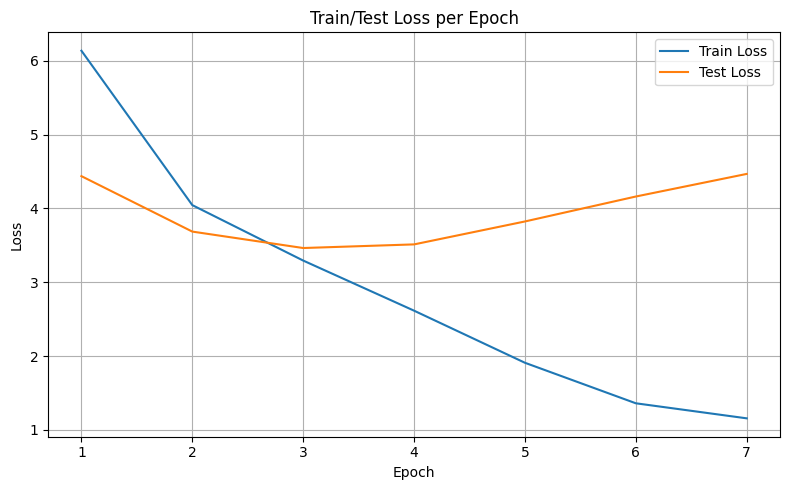

In [28]:
transformer1, train_log, valid_log = main(
    transformer1,
    optimizer,
    "transformer1_",
    EPOCHS=10,
    early_stopping=early_stopping,
    train_dataset=train_dataset,
    valid_dataset=valid_dataset,
)

In [29]:
import torch
import math
from transformers import AutoTokenizer, AutoModelForCausalLM

def generate_answer(model, tokenizer, question, device, max_length=50):
    # ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä ÏãúÏûë ÌÜ†ÌÅ∞ Ï°∞Ìï©
    prompt = f"ÏßàÎ¨∏: {question}\nÎãµÎ≥Ä: "
    inputs = tokenizer(prompt, return_tensors='pt').to(device)
    output_ids = model.generate(
        **inputs,
        max_length=inputs['input_ids'].size(1) + max_length,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True,  # ÏÉòÌîåÎßÅÏúºÎ°ú Îã§ÏñëÏÑ± Ï¶ùÍ∞Ä Í∞ÄÎä•
        top_p=0.9,
        top_k=50,
        temperature=0.8
    )
    generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    # ÎãµÎ≥Ä Î∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú (ÏßàÎ¨∏ Îã§ÏùåÎ∂ÄÌÑ∞)
    answer = generated_text.split("ÎãµÎ≥Ä:")[-1].strip()
    return answer

def calculate_perplexity_for_answer(model, tokenizer, question, answer, device):
    conversation = f"ÏßàÎ¨∏: {question}\nÎãµÎ≥Ä: {answer}"

    inputs = tokenizer(conversation, return_tensors='pt', padding=True).to(device)

    question_part = f"ÏßàÎ¨∏: {question}\nÎãµÎ≥Ä: "
    question_inputs = tokenizer(question_part, return_tensors='pt')
    question_length = question_inputs['input_ids'].size(1)

    with torch.no_grad():
        outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'], labels=inputs['input_ids'])

        shift_logits = outputs.logits[..., :-1, :].contiguous()
        shift_labels = inputs['input_ids'][..., 1:].contiguous()

        answer_mask = torch.zeros_like(shift_labels, dtype=torch.bool)
        answer_mask[:, question_length-1:] = True

        loss_fct = torch.nn.CrossEntropyLoss(reduction='none')
        losses = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        losses = losses.view(shift_labels.shape)

        masked_losses = losses * answer_mask.float()
        answer_loss = masked_losses.sum() / answer_mask.sum()

    return math.exp(answer_loss.item())



device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
model.eval()

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

qa_pairs = [
    ("ÏßÄÎ£®ÌïòÎã§, ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Ïñ¥.", "Í∑∏Îü¥ Îïê Í∞ÄÎ≥çÍ≤å ÏÇ∞Ï±ÖÏù¥ÎùºÎèÑ ÎÇòÍ∞ÄÎ≥¥Îäî Í±¥ Ïñ¥ÎïåÏöî? Í∏∞Î∂Ñ Ï†ÑÌôòÏóê Ï¢ãÏùÑ Í±∞ÏòàÏöî!"),
    ("Ïò§Îäò ÏùºÏ∞ç ÏùºÏñ¥ÎÇ¨ÎçîÎãà ÌîºÍ≥§ÌïòÎã§.", "ÏàòÍ≥† ÎßéÏïòÎÑ§Ïöî! Ïû†Íπê ÎààÏù¥ÎùºÎèÑ Î∂ôÏù¥Î©¥ Ï¢Ä ÎÇòÏïÑÏßà Í±∞ÏòàÏöî."),
    ("Í∞ÑÎßåÏóê Ïó¨ÏûêÏπúÍµ¨Îûë Îç∞Ïù¥Ìä∏ ÌïòÍ∏∞Î°ú ÌñàÏñ¥.", "Ï¢ãÏùÄ ÏãúÍ∞Ñ Î≥¥ÎÇ¥ÏÑ∏Ïöî! Ïñ¥Îîî Í∞ÄÏã§ Í±¥Í∞ÄÏöî?"),
    ("ÏßëÏóê ÏûàÎäîÎã§Îäî ÏÜåÎ¶¨Ïïº.", "Í∑∏Îüº ÏßëÏóêÏÑú Ìëπ Ïâ¨Í±∞ÎÇò Ï¢ãÏïÑÌïòÎäî Í±∞ ÌïòÎ©¥ÏÑú ÌûêÎßÅÌï¥Î≥¥ÏÑ∏Ïöî!")
]

print("=== ÏÉùÏÑ± ÎãµÎ≥Ä Î∞è Í∞úÎ≥Ñ Perplexity Ï∂úÎ†• ===")
for question, ground_truth in qa_pairs:
    generated_answer = generate_answer(model, tokenizer, question, device)
    ppl = calculate_perplexity_for_answer(model, tokenizer, question, generated_answer, device)
    print(f"ÏßàÎ¨∏: {question}")
    print(f"ÏÉùÏÑ± ÎãµÎ≥Ä: {generated_answer}")
    print(f"ÏÉùÏÑ± ÎãµÎ≥Ä Perplexity: {ppl:.2f}")
    print('-' * 40)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


=== ÏÉùÏÑ± ÎãµÎ≥Ä Î∞è Í∞úÎ≥Ñ Perplexity Ï∂úÎ†• ===


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


ÏßàÎ¨∏: ÏßÄÎ£®ÌïòÎã§, ÎÜÄÎü¨Í∞ÄÍ≥† Ïã∂Ïñ¥.
ÏÉùÏÑ± ÎãµÎ≥Ä: Í≥ºÏ†úÍ≥º, Ï†ÄÏó∞Îäî ÎÑ§Î¨¥Î¶¨Í∏∞Í≥† ÏßÄÎäîÎ∂ÄÍ≤åÏúºÔøΩ
ÏÉùÏÑ± ÎãµÎ≥Ä Perplexity: 6.24
----------------------------------------
ÏßàÎ¨∏: Ïò§Îäò ÏùºÏ∞ç ÏùºÏñ¥ÎÇ¨ÎçîÎãà ÌîºÍ≥§ÌïòÎã§.
ÏÉùÏÑ± ÎãµÎ≥Ä: Í∞ÄÏÇ¨ÏßàÎã§Í∞Ä ÏßÄÎ•º Ïã§Îäò Í≤åÏßÄÎ•º ÏàòÎäîÎãàÎã§. Ïã†ÔøΩ
ÏÉùÏÑ± ÎãµÎ≥Ä Perplexity: 5.78
----------------------------------------
ÏßàÎ¨∏: Í∞ÑÎßåÏóê Ïó¨ÏûêÏπúÍµ¨Îûë Îç∞Ïù¥Ìä∏ ÌïòÍ∏∞Î°ú ÌñàÏñ¥.
ÏÉùÏÑ± ÎãµÎ≥Ä: Í≤ÉÎßåÏóê Ïó¨ÏûêÏπúÍµ¨Îûë Îç∞Ïù¥Ìä∏ ÌïòÍ∏∞Î°ú ÌñàÏñ¥.
ÏÉùÏÑ± ÎãµÎ≥Ä Perplexity: 1.32
----------------------------------------
ÏßàÎ¨∏: ÏßëÏóê ÏûàÎäîÎã§Îäî ÏÜåÎ¶¨Ïïº.
ÏÉùÏÑ± ÎãµÎ≥Ä: Ìä∏Î¨¥Ïóê ÏûàÎäîÎã§Îäî ÏÜåÎ¶¨ÏïºÏßÄ Îì§Ïóê ÏûàÎäîÎã§Îäî ÔøΩ
ÏÉùÏÑ± ÎãµÎ≥Ä Perplexity: 2.54
----------------------------------------


# ÌöåÍ≥†
- eda Ï¶ùÍ∞ïÏùÑ ÌñàÎäîÎç∞ ÎØ∏ÏàôÌïú ÌÉìÏóê Îã®Ïñ¥Í∞Ä ÏûòÎ†§ÏÑú ÎÇòÏôîÎã§. ÌïòÏßÄÎßå ÏãúÍ∞ÑÏù¥ Î∂ÄÏ°±Ìï¥ÏÑú Í∑∏ÎåÄÎ°ú ÏßÑÌñâÌñàÎã§. + Ïú†ÏùòÏñ¥ ÎåÄÏ≤¥Í∞Ä ÎêòÏßÄ ÏïäÏïòÎã§.
- Í∑∏ Í≤∞Í≥º ÎãµÎ≥Ä ÏÉùÏÑ±Ïù¥ ÏïÑÏòà Ìï¥ÏÑùÌï† Ïàò ÏóÜÍ≤å ÎÇòÏôîÎã§. ÏïÑÎ¨¥ÎûòÎèÑ ÏïûÏÑú ÎßêÌïú Îã®Ïñ¥Í∞Ä ÏûòÎ¶∞ Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞Îì§ Î¨∏Ï†úÏù∏ Í≤É Í∞ôÎã§.
- eda Ï¶ùÍ∞ïÏùÑ ÏãúÎèÑÌïòÎ†§Î©¥ ÎûúÎç§ ÏÇ≠Ï†úÏóêÏÑúÎäî Ï°∞ÏÇ¨Îßå ÏÇ≠Ï†úÌïòÍ±∞ÎÇò, ÏÇΩÏûÖÏóêÏÑúÎäî Î™ÖÏÇ¨ÏôÄ ÏÑúÏà†Ïñ¥Î•º Ï∂îÍ∞ÄÌïòÍ±∞ÎÇò Í∑∏Îü∞ ÏãùÏúºÎ°ú ÏßÑÌñâÌï¥Ïïº Îê† Í≤É Í∞ôÎã§.
